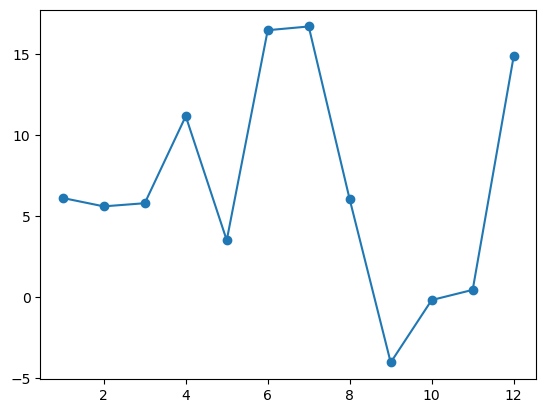

         distance     speed
dest                       
ABQ   1826.000000  7.370106
ACK    199.000000  4.815894
ALB    143.000000  4.538350
ANC   3370.000000  8.166432
ATL    757.108220  6.753035
...           ...       ...
TPA   1003.935575  6.984943
TUL   1215.000000  6.873666
TVC    652.386139  6.901976
TYS    638.809826  6.581703
XNA   1142.505792  6.720233

[105 rows x 2 columns]


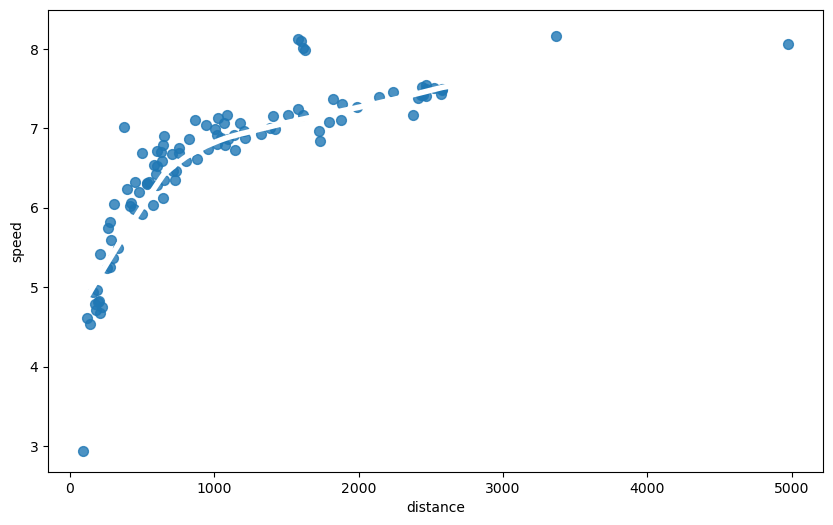

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming flights dataframe is already loaded
flights = pd.read_csv('flights.csv')

# Equivalent of: short_flights <- flights |> filter(air_time < 60)
short_flights = flights[flights['air_time'] < 60]

# Equivalent of: z <- (a + b)^2 / d
a, b, d = (1.0, 4.0, 6.0)
z = (a + b) ** 2 / d

# Equivalent of: x <- c(1.0, 2.0, 3.0, 4.0, 5.0, 6.0)
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
mean_x = np.mean(x)  # This assumes no NaN values. Use np.nanmean(x) if there could be NaN values.

# Multiple mutations on the flights dataframe
flights['speed'] = flights['distance'] / flights['air_time']
flights['dep_hour'] = flights['dep_time'] // 100
flights['dep_minute'] = flights['dep_time'] % 100

# Filtering and counting
filtered_flights = flights.dropna(subset=['arr_delay', 'tailnum'])
count_dest = filtered_flights['dest'].value_counts()

# Grouping and summarizing
grouped_by_tailnum = flights.groupby('tailnum').agg(
    delay=pd.NamedAgg(column='arr_delay', aggfunc='mean'),
    n=pd.NamedAgg(column='arr_delay', aggfunc='size')  # size will count NaN values too.
)

# This fits compactly on one line
# df['y'] = df['x'] + 1

# Grouping by month and plotting
grouped_by_month = flights.groupby('month').agg(
    delay=pd.NamedAgg(column='arr_delay', aggfunc='mean')
)
plt.plot(grouped_by_month.index, grouped_by_month['delay'], marker='o')
plt.show()

# Before computing grouped_by_dest, calculate speed first:
flights['speed'] = flights['distance'] / flights['air_time']

# Then group by 'dest' and aggregate:
grouped_by_dest = flights.groupby('dest').agg(
    distance=('distance', 'mean'),
    speed=('speed', 'mean')
)

print(grouped_by_dest)

plt.figure(figsize=(10, 6))
sns.regplot(data=grouped_by_dest, x='distance', y='speed', lowess=True, scatter_kws={'s':50}, line_kws={'color':'white', 'linewidth':4})
plt.show()
